In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Housing.csv') 

In [10]:
# Convert categorical to binary (optional: not needed for just area vs price)
# We're focusing only on 'area' and 'price' here
df = df.dropna()  # Ensure no NaN values

In [11]:
# Encode categorical columns
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
            'airconditioning', 'prefarea', 'furnishingstatus']

In [12]:
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders in case needed later

# Define features and target
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
        'mainroad', 'guestroom', 'basement', 'hotwaterheating',
        'airconditioning', 'prefarea', 'furnishingstatus']]
y = df['price']
y = df['price']   # Target

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [14]:

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.6494754192267805
MSE: 1771751116594.0342


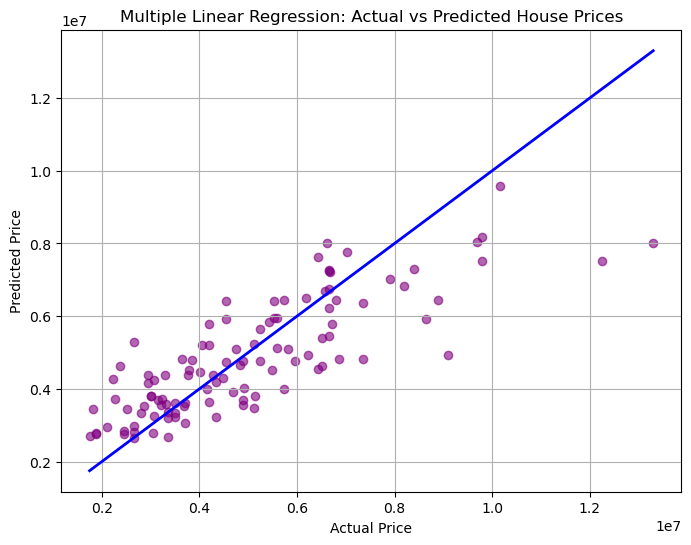

In [15]:
# Scatter Plot of Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='blue', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Linear Regression: Actual vs Predicted House Prices')
plt.grid(True)
plt.show()
